#### This notebook is used for Stevens BIA660 - Web Analytics project, data source: Consumer  Financial Protection Bureau. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("ComsumerComplaints.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985957 entries, 0 to 985956
Data columns (total 19 columns):
Unnamed: 0                   985957 non-null int64
company                      985957 non-null object
company_public_response      298217 non-null object
company_response             985955 non-null object
complaint_id                 985957 non-null int64
narratives                   256666 non-null object
consumer_consent_provided    456861 non-null object
consumer_disputed            768568 non-null object
date_received                985957 non-null object
date_sent_to_company         985957 non-null object
issue                        985957 non-null object
product                      985957 non-null object
state                        968668 non-null object
sub_issue                    495323 non-null object
sub_product                  750787 non-null object
submitted_via                985957 non-null object
tags                         136828 non-null object
timely 

- In total, we have 985957 records including all categories. 

In [3]:
#remove the first unidefined column
df = df.drop(df.columns[0], axis = 1)

In [4]:
df.shape
#df.head()

(985957, 18)

In [5]:
#save a copy of raw data in case of further use
raw_df = df.copy()

In [6]:
#keep narratives which are not null
df1 = raw_df[~raw_df['narratives'].isnull()]
df1.shape

(256666, 18)

- After removing all NA/N records in "narrative" columns, we have 25666 records in total.

In [7]:
#remove duplicate narratives but keep the first one
df2 = df1.drop_duplicates('narratives',keep = "first")
df2.shape

(248614, 18)

- After removing duplicate records, we have 248614 records in total.

In [8]:
df2.head()

,company,company_public_response,company_response,complaint_id,narratives,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,sub_issue,sub_product,submitted_via,tags,timely,zip_code
2,"Alpine Credit, Inc",Company disputes the facts presented in the co...,Closed with explanation,2383241,I have not been contacted about this negative ...,Consent provided,No,2017-03-13T00:00:00.000,2017-03-15T00:00:00.000,Cont'd attempts collect debt not owed,Debt collection,AR,Debt was paid,I do not know,Web,NaN,No,729XX
18,Experian Information Solutions Inc.,Company has responded to the consumer and the ...,Closed with explanation,2788944,There are many mistakes appear in my report wi...,Consent provided,NaN,2018-01-20T00:00:00.000,2018-01-20T00:00:00.000,Incorrect information on your report,"Credit reporting, credit repair services, or o...",MD,Account information incorrect,Credit reporting,Web,NaN,Yes,212XX
21,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Company has responded to the consumer and the ...,Closed with explanation,2773990,I was pulling my credit to looking into buying...,Consent provided,NaN,2018-01-06T00:00:00.000,2018-01-06T00:00:00.000,Incorrect information on your report,"Credit reporting, credit repair services, or o...",FL,Information belongs to someone else,Credit reporting,Web,NaN,Yes,347XX
29,"BANK OF AMERICA, NATIONAL ASSOCIATION",Company has responded to the consumer and the ...,Closed with explanation,2412744,I bought a money order from XXXX XXXX to pay a...,Consent provided,No,2017-03-31T00:00:00.000,2017-04-03T00:00:00.000,Lost or stolen money order,Other financial service,NY,NaN,Money order,Web,NaN,Yes,100XX
39,"Caliber Home Loans, Inc.",NaN,Closed with explanation,2737995,"Since XXXX XXXX, I was working with a loan con...",Consent provided,NaN,2017-11-26T00:00:00.000,2017-11-26T00:00:00.000,Applying for a mortgage or refinancing an exis...,Mortgage,MD,NaN,Conventional home mortgage,Web,NaN,Yes,208XX


#### Take a look at the relationship between product and issue

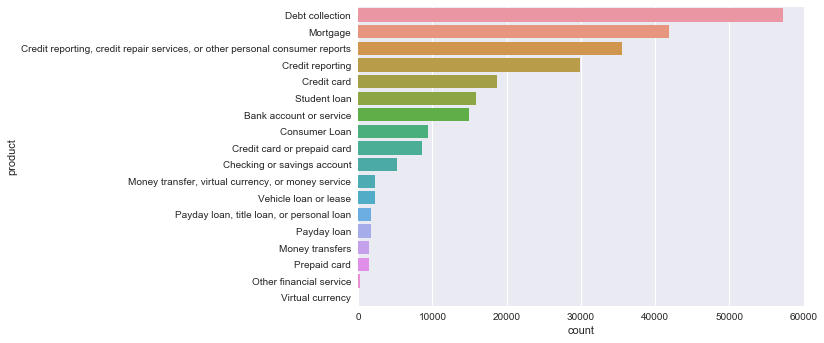

In [9]:
#Plot complaints amounts by products
sns.countplot(y = "product", data = df2,\
             order = df2['product'].value_counts().index)
plt.show()

In [69]:
#Percentage of top 6 product complaints
top6_percentage = df2['product'].value_counts()[:6].sum()/df2['product'].value_counts().sum()
print("Percentage of top 6 product complaints: ", top6_percentage)

#Get top6_products name
products_name = df2['product'].value_counts()[:6].index
products_name

#Create a dictionary of top 6 products
products = {}
for product in products_name:
    products[product] = df2[df2['product'] == product]

products

Percentage of top 6 product complaints:  0.8009685697506979


Index(['Debt collection', 'Mortgage',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting', 'Credit card', 'Student loan'],
      dtype='object')

{'Credit card':                                              company  \
 45             BANK OF AMERICA, NATIONAL ASSOCIATION   
 68                            BARCLAYS BANK DELAWARE   
 94                            BARCLAYS BANK DELAWARE   
 111                           BARCLAYS BANK DELAWARE   
 215                           BARCLAYS BANK DELAWARE   
 470            BANK OF AMERICA, NATIONAL ASSOCIATION   
 683            BANK OF AMERICA, NATIONAL ASSOCIATION   
 983                           BARCLAYS BANK DELAWARE   
 984                           BARCLAYS BANK DELAWARE   
 997            BANK OF AMERICA, NATIONAL ASSOCIATION   
 1006                          BARCLAYS BANK DELAWARE   
 1019           BANK OF AMERICA, NATIONAL ASSOCIATION   
 1058                          BARCLAYS BANK DELAWARE   
 1070                            SUNTRUST BANKS, INC.   
 1088           BANK OF AMERICA, NATIONAL ASSOCIATION   
 1151                          BARCLAYS BANK DELAWARE   
 1168           

[<matplotlib.text.Text at 0x122b6c390>, <matplotlib.text.Text at 0x122b77f98>]

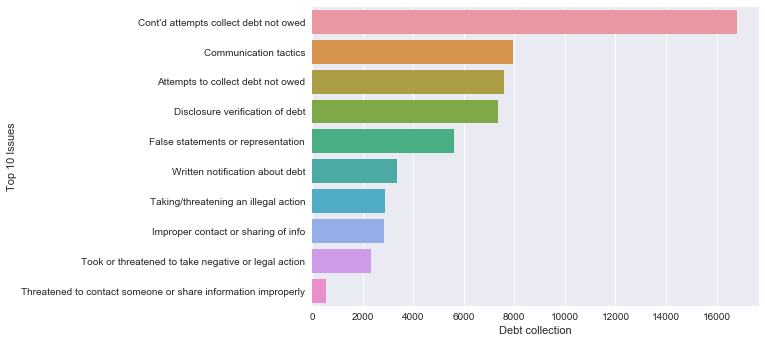

[<matplotlib.text.Text at 0x10de9b828>, <matplotlib.text.Text at 0x11dcf0860>]

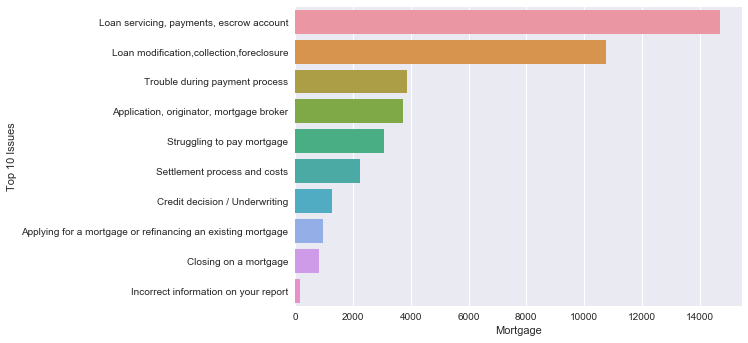

[<matplotlib.text.Text at 0x1180d17b8>, <matplotlib.text.Text at 0x11dd1b320>]

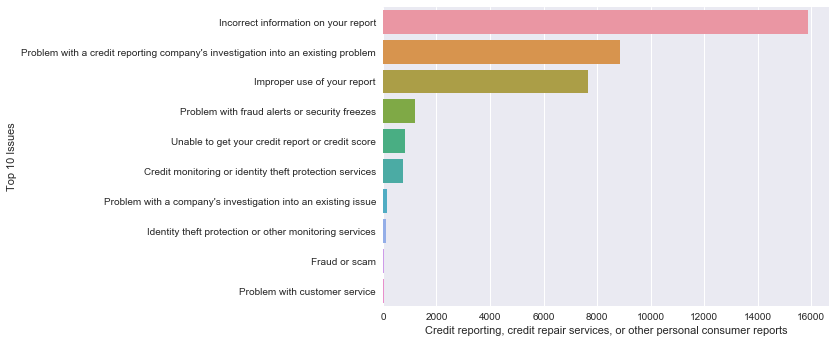

[<matplotlib.text.Text at 0x1206ac438>, <matplotlib.text.Text at 0x11b590a20>]

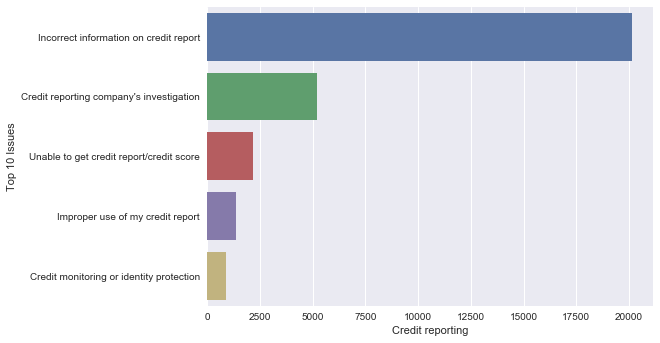

[<matplotlib.text.Text at 0x1205e05f8>, <matplotlib.text.Text at 0x1231e9a90>]

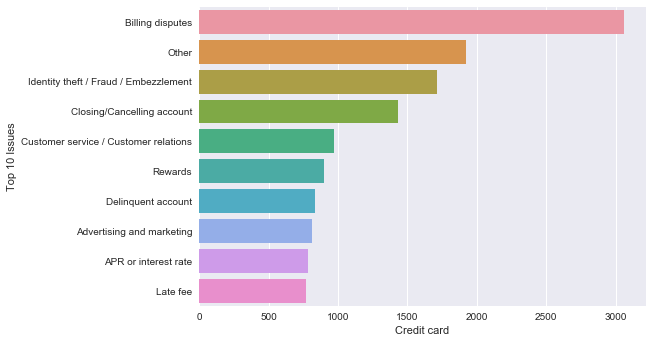

[<matplotlib.text.Text at 0x1235f1d68>, <matplotlib.text.Text at 0x126ed6ba8>]

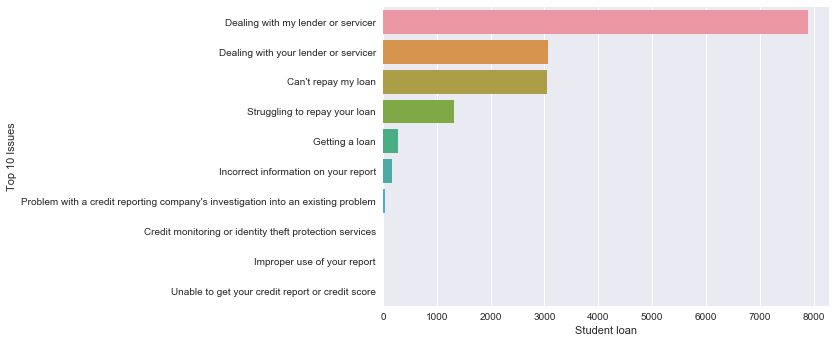

In [83]:
########my way to plot#####
for product in products_name:
    mydata = df2[df2['product'] == product]
    
    mygraph = sns.countplot(y = "issue", data = mydata , \
              order = mydata.issue.value_counts()[:10].index)
        
    mygraph.set(xlabel = product, ylabel = "Top 10 Issues")
    plt.show()

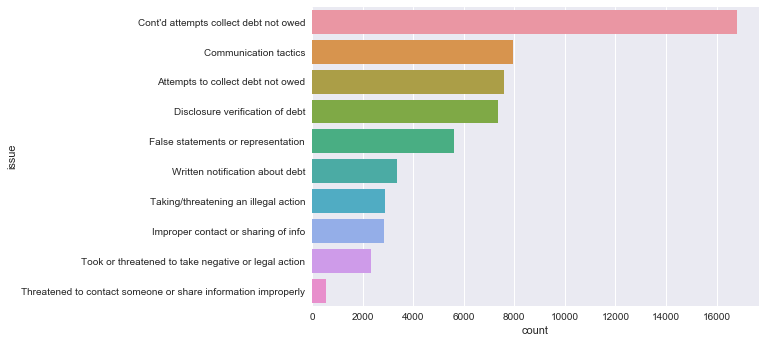

issue distribution for Debt collection


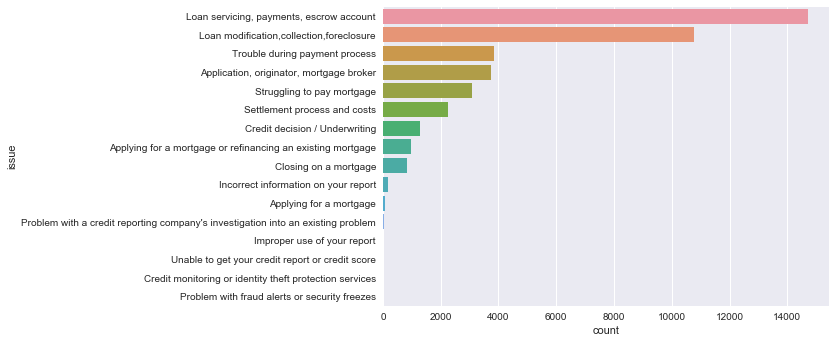

issue distribution for Mortgage


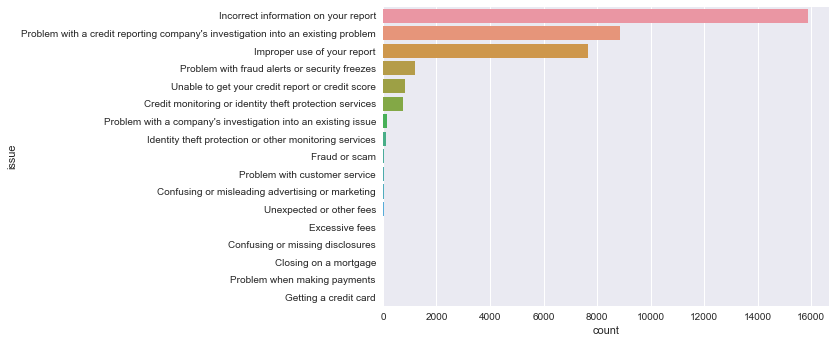

issue distribution for Credit reporting, credit repair services, or other personal consumer reports


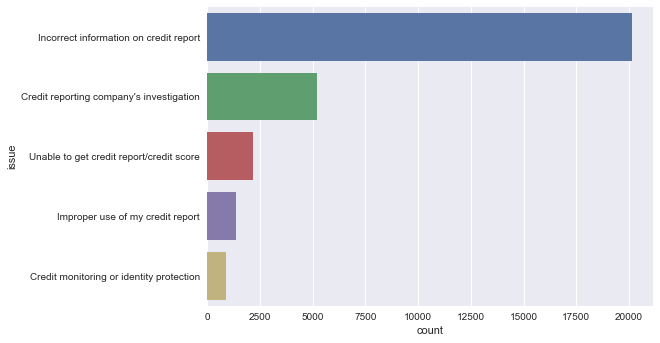

issue distribution for Credit reporting


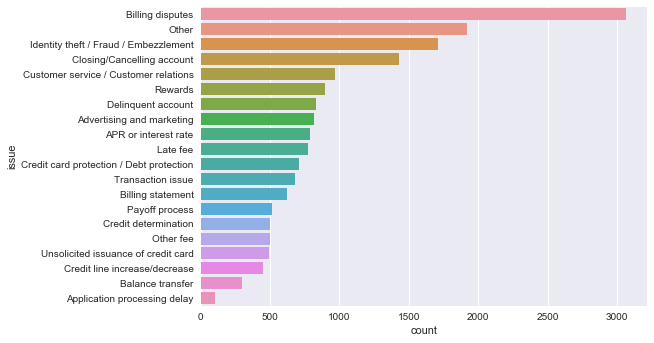

issue distribution for Credit card


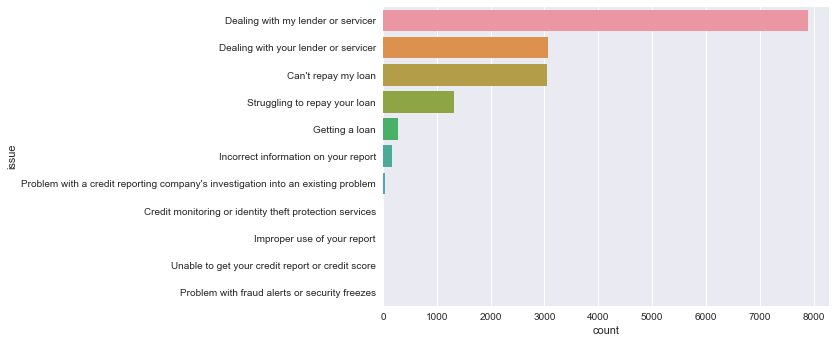

issue distribution for Student loan


In [71]:
######Lulu's way to plot#######
for i in range(len(products_name)):
    _product = products[products_name[i]]
    issues = _product['issue'].value_counts().index
    
    if len(issues) <= 20:
        sns.countplot(y = "issue", data = _product, order = issues)
        plt.show()
        print('issue distribution for',products_name[i])
        
    else: 

        _issues = _product[_product['issue'].isin(list(issues[:20]))]
        
        sns.countplot(y = "issue", data = _issues, order = issues[:20])
        plt.show()
        print('issue distribution for',products_name[i])

#### Take a look at the relationship between company and issue

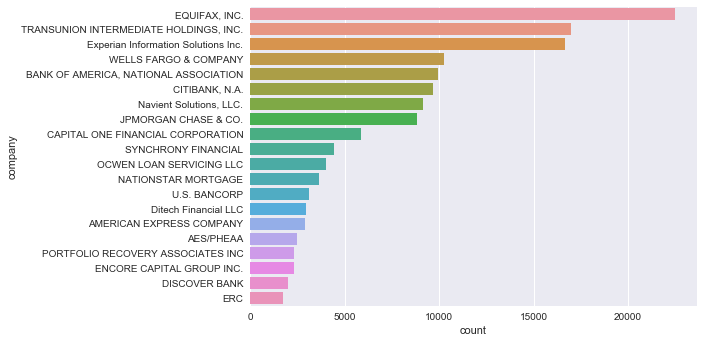

In [10]:
#Plot complaints amounts by company
sns.countplot(y = "company", data = df2, \
              order = df2.company.value_counts()[:20].index)
plt.show()

- The histogram shows  top 20 companies with highest complaints amount.

In [49]:
#Focus on top 6 companies with hightes complaints
top6company = ['EQUIFAX, INC.','TRANSUNION INTERMEDIATE HOLDINGS, INC.',\
               'Experian Information Solutions Inc.','WELLS FARGO & COMPANY',\
               'BANK OF AMERICA, NATIONAL ASSOCIATION', 'CITIBANK, N.A.']

#Find the issues of the 6 companies
top6company_issue = df2[df2.company.isin(top6company)].issue.value_counts()
top6company_issue

Incorrect information on credit report                                              18870
Incorrect information on your report                                                12135
Problem with a credit reporting company's investigation into an existing problem     7592
Improper use of your report                                                          6302
Credit reporting company's investigation                                             5021
Loan modification,collection,foreclosure                                             3211
Account opening, closing, or management                                              2761
Loan servicing, payments, escrow account                                             2416
Unable to get credit report/credit score                                             2089
Improper use of my credit report                                                     1240
Deposits and withdrawals                                                             1176
Problem wi

[<matplotlib.text.Text at 0x1235b94a8>, <matplotlib.text.Text at 0x11dcaefd0>]

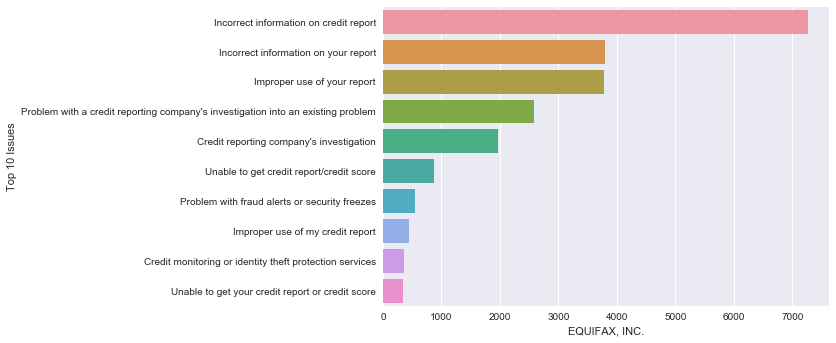

[<matplotlib.text.Text at 0x1235d3e80>, <matplotlib.text.Text at 0x122fcb6d8>]

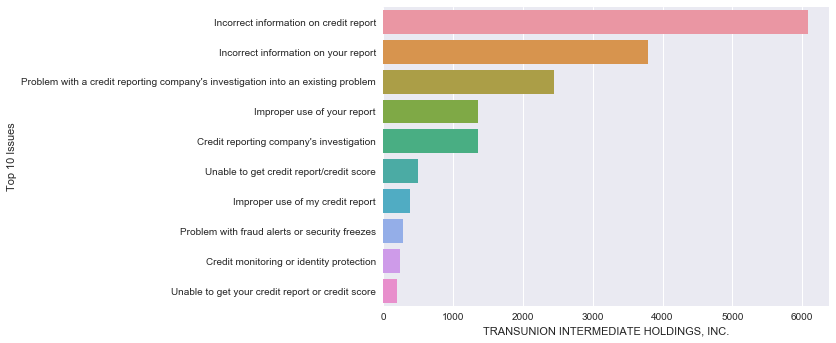

[<matplotlib.text.Text at 0x11824d0f0>, <matplotlib.text.Text at 0x1233e2da0>]

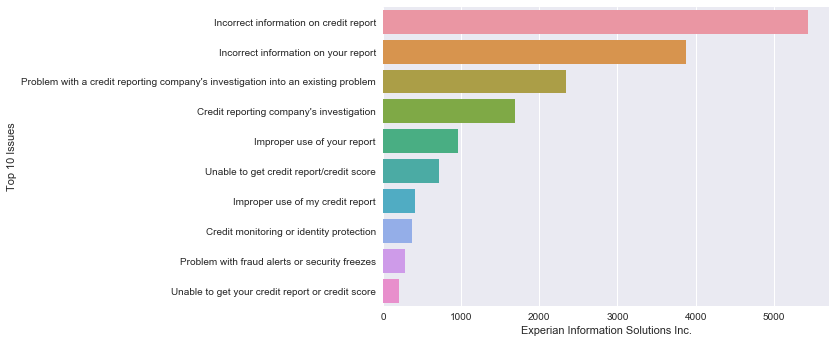

[<matplotlib.text.Text at 0x121000860>, <matplotlib.text.Text at 0x1224b5860>]

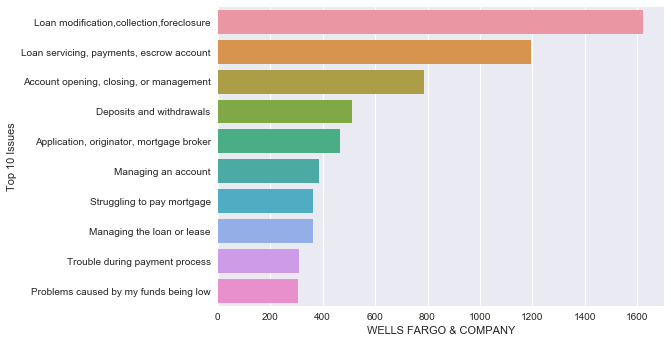

[<matplotlib.text.Text at 0x11ab2e0f0>, <matplotlib.text.Text at 0x1231b8a20>]

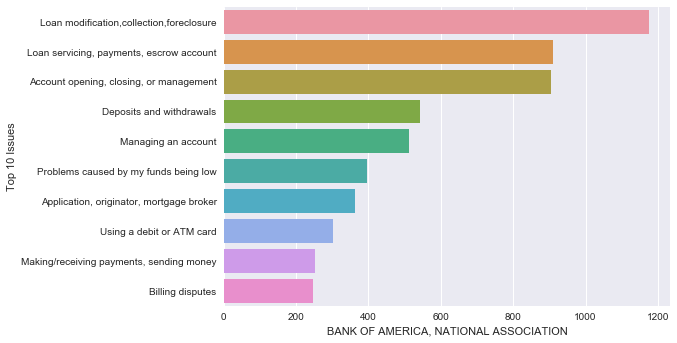

[<matplotlib.text.Text at 0x11dd45c50>, <matplotlib.text.Text at 0x127e2b8d0>]

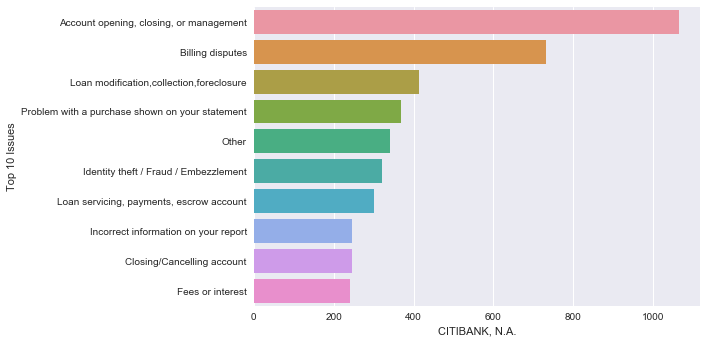

In [84]:
#Visualize top 6 issues for each top 6 companies 
for company in top6company:
    mydata = df2[df2['company'] == company]
    mygraph = sns.countplot(y = "issue", data = mydata , \
              order = mydata.issue.value_counts()[:10].index)
    mygraph.set(xlabel = company, ylabel = "Top 10 Issues")
    plt.show()

#### Take a look at the complaints amount by timeline for top 6 companies

In [17]:
#Define a function to convert the "objective" into "datetime"
import datetime

def converttime(j):
    j=j.split("T")[0] #"date received" format: "2017-11-26T00:00:00.000"
    j=datetime.datetime.strptime(j, '%Y-%m-%d')
    
    return j

In [23]:
#Apply funtion into the column
df2['date_received'] = df2['date_received'].apply(converttime)
df2['date_received'].head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2    2017-03-13
18   2018-01-20
21   2018-01-06
29   2017-03-31
39   2017-11-26
Name: date_received, dtype: datetime64[ns]

In [26]:
#df2['Qtr'] = df2.date_received.dt.quarter

#Add a column "Qtr" indicates the quarter of the year
df2['Qtr'] = pd.PeriodIndex(df2.date_received, freq='Q')
df2['Qtr'].head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2    2017Q1
18   2018Q1
21   2018Q1
29   2017Q1
39   2017Q4
Name: Qtr, dtype: object

In [58]:
#Subset of top6companies
top6company_df = df2[df2.company.isin(top6company)]
top6company_df
#Group by "company" and "Qtr"
G = top6company_df.groupby(['company','Qtr']).size()
comp_groupby_Q =  pd.DataFrame(G)
comp_groupby_Q.columns = ['Complaint Amount']
comp_groupby_Q

Complaint Amount
company                                Qtr                     
BANK OF AMERICA, NATIONAL ASSOCIATION  2015Q1               133
                                       2015Q2               960
                                       2015Q3               892
                                       2015Q4               772
                                       2016Q1               785
                                       2016Q2               818
                                       2016Q3               898
                                       2016Q4               883
                                       2017Q1               909
                                       2017Q2               836
                                       2017Q3               799
                                       2017Q4               838
                                       2018Q1               393
CITIBANK, N.A.                         2015Q1                95
                                       2015Q2               603
                                       2015Q3               697
                                       2015Q4               646
                                       2016Q1               746
                                       2016Q2              1024
                                       2016Q3              1240
                                       2016Q4               839
                                       2017Q1               898
                                       2017Q2               838
                                       2017Q3               793
                                       2017Q4               828
                                       2018Q1               426
EQUIFAX, INC.                          2015Q1               136
                                       2015Q2              1060
                                       2015Q3              1260
                                       2015Q4              1061
...                                                         ...
Experian Information Solutions Inc.    2017Q2              2221
                                       2017Q3              2708
                                       2017Q4              2355
                                       2018Q1              1091
TRANSUNION INTERMEDIATE HOLDINGS, INC. 2015Q1               100
                                       2015Q2               708
                                       2015Q3              1208
                                       2015Q4               766
                                       2016Q1               816
                                       2016Q2               955
                                       2016Q3              1176
                                       2016Q4              1220
                                       2017Q1              1271
                                       2017Q2              2237
                                       2017Q3              2949
                                       2017Q4              2275
                                       2018Q1              1318
WELLS FARGO & COMPANY                  2015Q1                93
                                       2015Q2               738
                                       2015Q3               839
                                       2015Q4               731
                                       2016Q1               749
                                       2016Q2               763
                                       2016Q3              1193
                                       2016Q4              1216
                                       2017Q1               954
                                       2017Q2               939
                                       2017Q3               881
                                       2017Q4               776
                                       2018Q1               374

[78 rows x 1 c

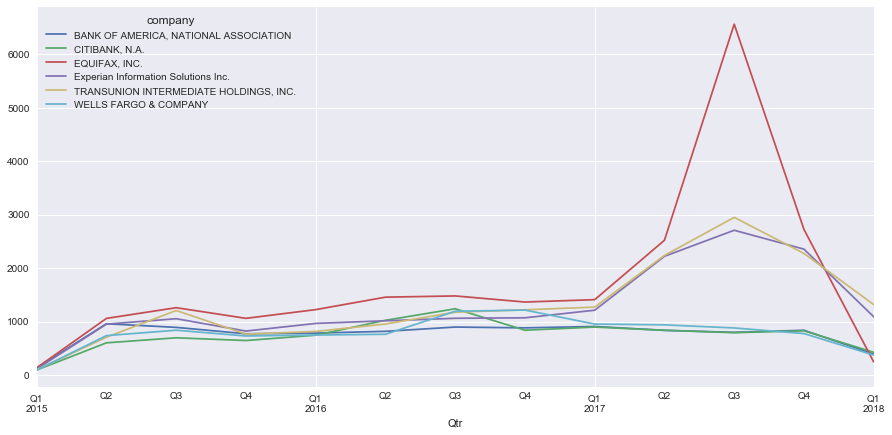

In [59]:
#Plot the timeline
fig, ax = plt.subplots(figsize=(15,7))
comp_groupby_Q['Complaint Amount'].unstack(level = 0).plot(ax=ax)
plt.show()

#### Text visualization

In [8]:
#Import package to preprocess text 
import nltk, re, string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [9]:
#Extract all narratives
all_narratives = df2['narratives'].tolist()
all_narratives

['I have not been contacted about this negative balance. I believe its through Alpine Credit or XXXX. This account was positive before I closed it and I do not understand why its still negative. I would like to get this issue resolved immediately because it is affecting my credit score immensely. I have had no debt collector call me or any mail correspondence delivered to me.',
 'There are many mistakes appear in my report without my understanding.',
 'I was pulling my credit to looking into buying a home this year and I seen that there was quite a few unauthorized accounts on my Trans Union,  XXXX, XXXX reports. I have not access my credit file since XXXX or XXXX and it seem as if someone use my personal information to access utilities and cable bills. I do not recognize these accounts that are listed on my credit file XXXX XXXX XXXX # XXXX, XXXX XXXX XXXX, XXXX XXXX XXXX # XXXX, XXXX XXXX XXXX ... I no longer live at the follow addresses I have been the victim of ID Theft so please r

In [30]:
#Tokenize all narratives
text = " ".join(all_narratives).lower()
tokens = nltk.word_tokenize(text)

#Extract all tokens which are not in stop_words and punctuation
my_tokens = [token.strip() for token in tokens\
             if token.strip() not in stop_words\
            and token.strip() not in string.punctuation]

#Stemming all tokens
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
stem_tokens = [porter_stemmer.stem(my_token) for my_token in my_tokens]

#Remove non-English words
words = set(nltk.corpus.words.words())
final_tokens=[token for token in stem_tokens if token in words]
final_tokens

['contact',
 'credit',
 'account',
 'posit',
 'close',
 'understand',
 'still',
 'would',
 'like',
 'get',
 'affect',
 'credit',
 'score',
 'debt',
 'collector',
 'call',
 'mail',
 'correspond',
 'mani',
 'appear',
 'report',
 'without',
 'understand',
 'pull',
 'credit',
 'look',
 'buy',
 'home',
 'year',
 'seen',
 'quit',
 'account',
 'union',
 'report',
 'access',
 'credit',
 'file',
 'seem',
 'use',
 'person',
 'inform',
 'access',
 'bill',
 'account',
 'list',
 'credit',
 'file',
 'longer',
 'live',
 'follow',
 'address',
 'victim',
 'id',
 'theft',
 'follow',
 'address',
 'oh',
 'oh',
 'oh',
 'oh',
 'oh',
 'oh',
 'oh',
 'oh',
 'oh',
 'oh',
 'oh',
 'oh',
 'bought',
 'money',
 'order',
 'pay',
 'bill',
 'found',
 'payment',
 'credit',
 'trace',
 'money',
 'order',
 'found',
 'stolen',
 'cash',
 'thief',
 'chang',
 'name',
 'payor',
 'file',
 'report',
 'ask',
 'order',
 'get',
 'money',
 'order',
 'sent',
 'letter',
 'say',
 'file',
 'claim',
 'behalf',
 'bank',
 'first',
 'deposit

In [31]:
#Get the word frequency 
word_freq = nltk.FreqDist(final_tokens)
word_freq

FreqDist({'contact': 97368,
          'credit': 364409,
          'account': 364497,
          'posit': 5530,
          'close': 63308,
          'understand': 16557,
          'still': 62692,
          'would': 178521,
          'like': 41598,
          'get': 108637,
          'affect': 10522,
          'score': 28424,
          'debt': 139115,
          'collector': 13348,
          'call': 247012,
          'mail': 44980,
          'correspond': 8524,
          'mani': 20972,
          'appear': 13427,
          'report': 271313,
          'without': 36786,
          'pull': 11477,
          'look': 22759,
          'buy': 8144,
          'home': 61781,
          'year': 93197,
          'seen': 3227,
          'quit': 3366,
          'union': 7753,
          'access': 15536,
          'file': 87699,
          'seem': 14061,
          'use': 60145,
          'person': 50234,
          'inform': 178677,
          'bill': 59509,
          'list': 28086,
          'longer': 13830,
   

In [ ]:
#word_freq_df = pd.DataFrame.from_dict(word_freq, orient = 'index')
#word_freq_df.columns = ['count']
#word_freq_df.sort_values(by = 'count', ascending = False).plot.bar()
#plt.show()

(-0.5, 399.5, 199.5, -0.5)

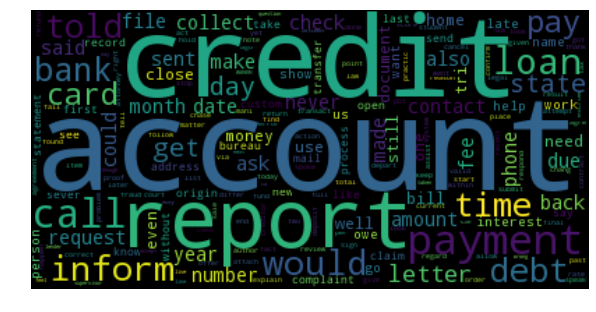

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(frequencies = word_freq)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df.iloc[:1000,:].to_csv("Sample_Comsumer_Complaints.csv")